# Train a neural network - basic classification

This project trains a neural network model to classify images of clothing, like sneakers and shirts. 

This guide uses tf.keras, a high-level API to build and train models in TensorFlow.

In [43]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [44]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [45]:
print(tf.__version__)

1.13.1


## Import the Fashion MNIST dataset

In [12]:
fashion_mnist = keras.datasets.fashion_mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Loading the dataset returns four NumPy arrays:
- The train_images and train_labels arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [14]:
train_images.shape

(60000, 28, 28)

In [16]:
test_images.shape

(10000, 28, 28)

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

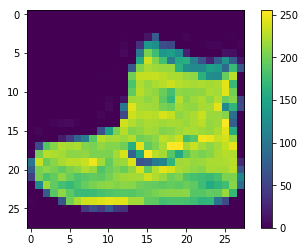

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network

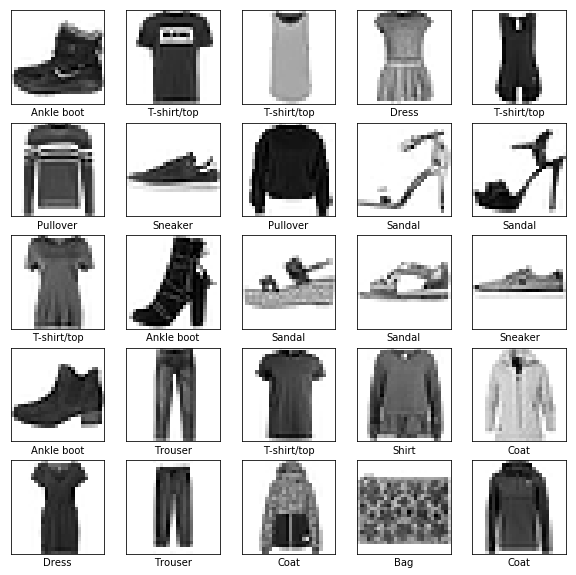

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model

### Setup the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


#### Note --

- The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data
- After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step

- Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction
- Optimizer —This is how the model is updated based on the data it sees and its loss function
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [24]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:
- Feed the training data to the model—in this example, the train_images and train_labels arrays.
- The model learns to associate images and labels.
- We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array. 

To start training, call the model.fit method—the model is "fit" to the training data:

In [25]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.4979 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3725 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3362 - acc: 0.8778
Epoch 4/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.3115 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2936 - acc: 0.8913


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.3536 - acc: 0.8745
Test accuracy: 0.8745


## Important point
It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of <b>overfitting</b>. Overfitting is when a machine learning model performs worse on new data than on their training data

### Make predictions

In [27]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [28]:
predictions[0]

array([2.8992330e-05, 8.2853296e-07, 2.7231590e-07, 6.4969647e-08,
       4.2316938e-06, 1.2330161e-01, 2.6277289e-06, 1.3650282e-01,
       1.8087601e-05, 7.4014044e-01], dtype=float32)

<b>Note---</b>
A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value

In [29]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct

In [30]:
test_labels[0]


9

We can graph this to look at the full set of 10 channels

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Let's look at the 0th image, predictions, and prediction array. 

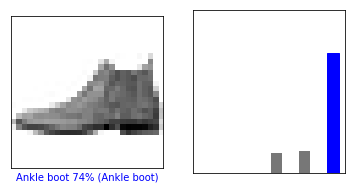

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

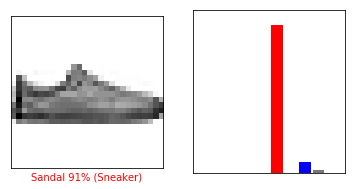

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

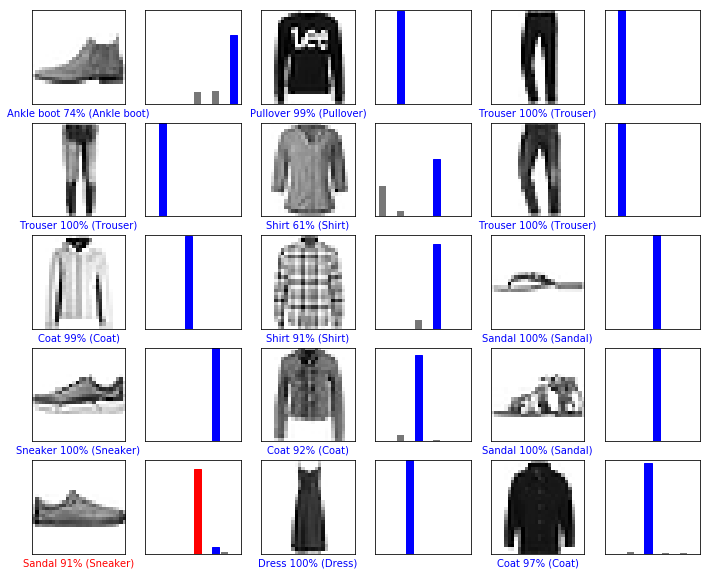

In [34]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [38]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [40]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.89923282e-05 8.28532848e-07 2.72315361e-07 6.49697682e-08
  4.23169377e-06 1.23301685e-01 2.62772869e-06 1.36502877e-01
  1.80876341e-05 7.40140378e-01]]


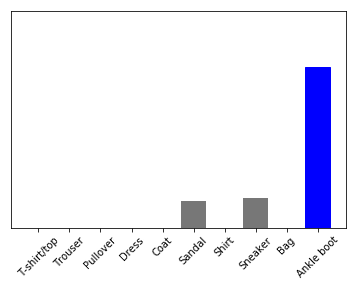

In [41]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [42]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9